In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# MsPacman

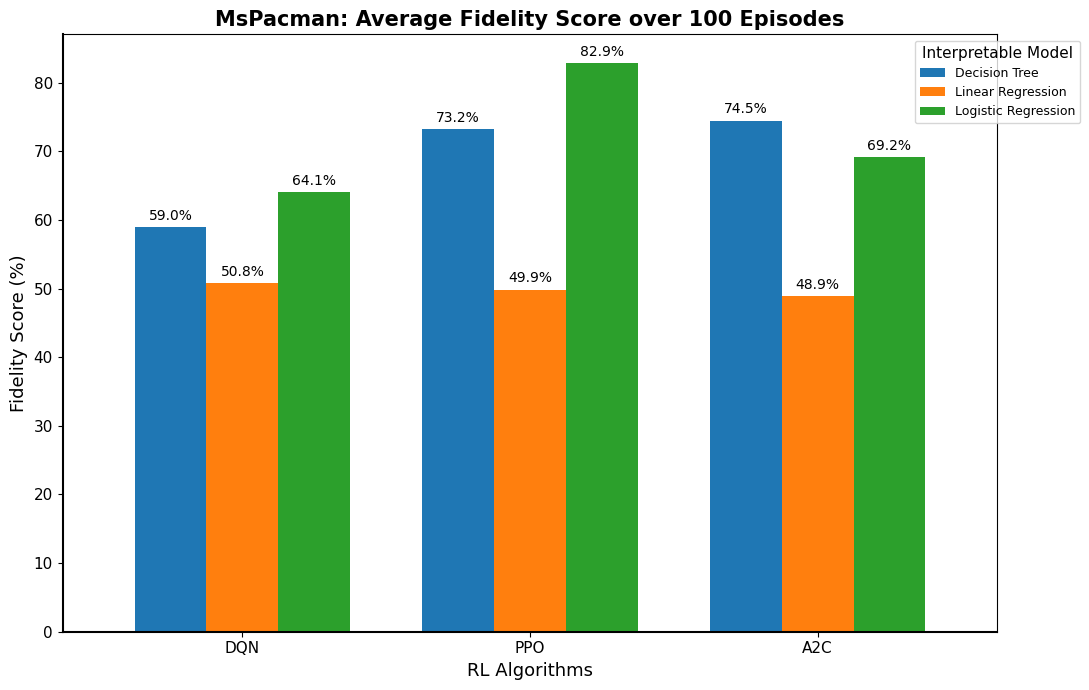

In [36]:
# === 1️⃣ 文件路径 ===
paths = {
    "DQN": "MsPacman_DQN_Fidelity.csv",
    "A2C": "MsPacman_A2C_Fidelity.csv",
    "PPO": "MsPacman_PPO_Fidelity.csv",
}

# === 2️⃣ 读取并整理数据 ===
def load_and_tidy(path, algorithm_name):
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]

    models = ["Decision Tree", "Linear Regression", "Logistic Regression"]
    detected = [c for c in df.columns if c.lower() in [m.lower() for m in models]]
    if len(detected) >= 3:
        row = df.iloc[0]
        tidy = pd.DataFrame({
            "algorithm": [algorithm_name] * 3,
            "model": models,
            "fidelity": [row[c] for c in models],
        })
    else:
        model_col = next((c for c in df.columns if "model" in c.lower()), None)
        fidelity_col = next((c for c in df.columns if "fidelity" in c.lower()), None)
        tidy = df[[model_col, fidelity_col]].rename(columns={model_col: "model", fidelity_col: "fidelity"})
        tidy["algorithm"] = algorithm_name

    mapping = {
        "decision tree": "Decision Tree",
        "linear regression": "Linear Regression",
        "logistic regression": "Logistic Regression",
        "logreg": "Logistic Regression",
        "logit": "Logistic Regression",
        "dt": "Decision Tree",
        "lr": "Linear Regression",
    }
    tidy["model"] = tidy["model"].astype(str).str.strip().str.lower().map(mapping).fillna(tidy["model"])
    tidy["fidelity"] = pd.to_numeric(tidy["fidelity"], errors="coerce")
    if tidy["fidelity"].max() <= 1.2:
        tidy["fidelity"] = tidy["fidelity"] * 100
    return tidy

# === 3️⃣ 合并并准备绘图数据 ===
tidy_all = pd.concat([load_and_tidy(p, algo) for algo, p in paths.items()], ignore_index=True)
plot_df = tidy_all.pivot(index="algorithm", columns="model", values="fidelity").reindex(["DQN", "PPO", "A2C"])   # ✅ 指定显示顺序

# === 4️⃣ 绘图 ===
fig, ax = plt.subplots(figsize=(11, 7))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # 蓝、橙、绿固定
plot_df.plot(kind="bar", ax=ax, color=colors, width=0.75)

# 添加数值标签
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", padding=3, fontsize=10)

# === 5️⃣ 美化图形 ===
ax.set_ylabel("Fidelity Score (%)", fontsize=13)
ax.set_xlabel("RL Algorithms", fontsize=13)
ax.set_title("MsPacman: Average Fidelity Score over 100 Episodes", fontsize=15, fontweight="bold")
ax.tick_params(axis='x', labelrotation=0, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# 图例缩小并放入图内右上角
ax.legend(
    title="Interpretable Model",
    title_fontsize=11,
    fontsize=9,
    loc="upper center",
    frameon=True,
    bbox_to_anchor=(1.0, 1.0)
)

plt.tight_layout()
plt.savefig("./MsPacman/MsPacman_Fidelity_Score.png", dpi=300, bbox_inches="tight")
plt.show()




# RoadRunner

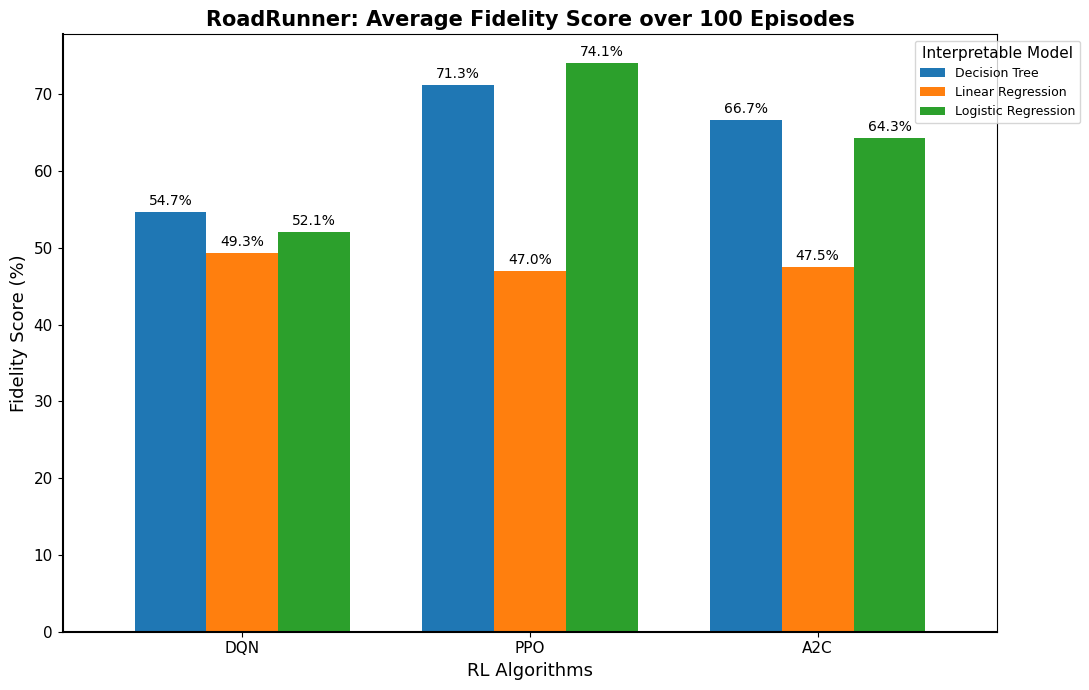

In [38]:
# === 1️⃣ 文件路径 ===
paths = {
    "DQN": "RoadRunner_DQN_Fidelity.csv",
    "A2C": "RoadRunner_A2C_Fidelity.csv",
    "PPO": "RoadRunner_PPO_Fidelity.csv",
}

# === 2️⃣ 读取并整理数据 ===
def load_and_tidy(path, algorithm_name):
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]

    models = ["Decision Tree", "Linear Regression", "Logistic Regression"]
    detected = [c for c in df.columns if c.lower() in [m.lower() for m in models]]
    if len(detected) >= 3:
        row = df.iloc[0]
        tidy = pd.DataFrame({
            "algorithm": [algorithm_name] * 3,
            "model": models,
            "fidelity": [row[c] for c in models],
        })
    else:
        model_col = next((c for c in df.columns if "model" in c.lower()), None)
        fidelity_col = next((c for c in df.columns if "fidelity" in c.lower()), None)
        tidy = df[[model_col, fidelity_col]].rename(columns={model_col: "model", fidelity_col: "fidelity"})
        tidy["algorithm"] = algorithm_name

    mapping = {
        "decision tree": "Decision Tree",
        "linear regression": "Linear Regression",
        "logistic regression": "Logistic Regression",
        "logreg": "Logistic Regression",
        "logit": "Logistic Regression",
        "dt": "Decision Tree",
        "lr": "Linear Regression",
    }
    tidy["model"] = tidy["model"].astype(str).str.strip().str.lower().map(mapping).fillna(tidy["model"])
    tidy["fidelity"] = pd.to_numeric(tidy["fidelity"], errors="coerce")
    if tidy["fidelity"].max() <= 1.2:
        tidy["fidelity"] = tidy["fidelity"] * 100
    return tidy

# === 3️⃣ 合并并准备绘图数据 ===
tidy_all = pd.concat([load_and_tidy(p, algo) for algo, p in paths.items()], ignore_index=True)
plot_df = tidy_all.pivot(index="algorithm", columns="model", values="fidelity").reindex(["DQN", "PPO", "A2C"])   # ✅ 指定显示顺序

# === 4️⃣ 绘图 ===
fig, ax = plt.subplots(figsize=(11, 7))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # 蓝、橙、绿固定
plot_df.plot(kind="bar", ax=ax, color=colors, width=0.75)

# 添加数值标签
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", padding=3, fontsize=10)

# === 5️⃣ 美化图形 ===
ax.set_ylabel("Fidelity Score (%)", fontsize=13)
ax.set_xlabel("RL Algorithms", fontsize=13)
ax.set_title("RoadRunner: Average Fidelity Score over 100 Episodes", fontsize=15, fontweight="bold")
ax.tick_params(axis='x', labelrotation=0, labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# 图例缩小并放入图内右上角
ax.legend(
    title="Interpretable Model",
    title_fontsize=11,
    fontsize=9,
    loc="upper center",
    frameon=True,
    bbox_to_anchor=(1.0, 1.0)
)

plt.tight_layout()
plt.savefig("./RoadRunner/RoadRunner_Fidelity_Score.png", dpi=300, bbox_inches="tight")
plt.show()